<b>EXPLANATORY DATA ANALYSIS ON COST OF USED CARS </b>
    
This Notebook contains codes and output of insight drawn from a machine learning Hackathon hosted in http://www.machinehack.com., if ypu want to read about the task of the hackathon you can follow this link http://www.machinehack.com/course/predicting-the-costs-of-used-cars-hackathon-by-imarticus/leaderboard. full details can be gotten there. 

In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
train = pd.read_excel('Data_Train.xlsx')

### Data preprocessing

In [3]:
#filling null values with mode
train['Mileage'] = train['Mileage'].fillna(train.Mileage.mode()[0])
train['Engine'] = train['Engine'].fillna(train.Engine.mode()[0])
train['Power'] = train['Power'].fillna(train.Power.mode()[0])
train['Seats'] = train['Seats'].fillna(train.Seats.mode()[0])

## EDA

Text(0.5, 1.0, 'Total Number of Pricing by year')

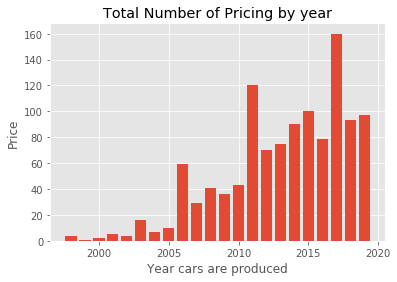

In [5]:
#Plotting The year a Car was produce against Its pricing values
plt.bar(train['Year'], train['Price'], align = 'center')
plt.xlabel('Year cars are produced')
plt.ylabel('Price')
plt.title('Total Number of Pricing by year')

Comparing the year in which a car type was produced against the Pricing(market share of cars),insights can be gotten from the above bar chat that the higher
the year a car was produced, the higher the pricing(market sales). Cars produced in year 2006, 2011, 2017 appears to be the cars with higher sales(pricing) from the data given.

Text(0.5, 1.0, 'Total Number of Fuel Type by Price')

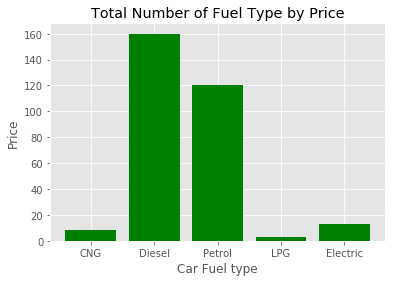

In [64]:
#Plotting Fuel Type of a Car against Its pricing values
plt.bar(train['Fuel_Type'],train['Price'], align = 'center', color = 'green' )
plt.xlabel('Car Fuel type')
plt.ylabel('Price')
plt.title('Total Number of Fuel Type by Price')

From the above bar chart, cars with petrol and diesel fuel type has the highest market shares compared to others. This follows that cars with diesel and petrol fuel type can influence high pricing since they are the cars with the most demand compared with car using CNG, LPG and Electric.

Text(0.5, 1.0, 'Total Number of Owner_Type by Price')

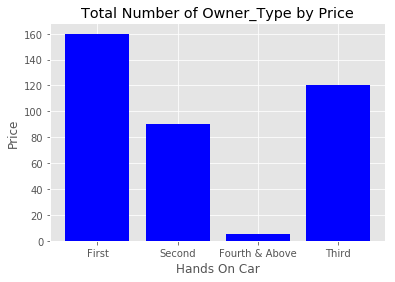

In [6]:
#Plotting How many Hands on Car against Its pricing values
plt.bar(train['Owner_Type'], train['Price'], align = 'center', color = 'blue')
plt.xlabel('Hands On Car')
plt.ylabel('Price')
plt.title('Total Number of Owner_Type by Price')

From the above bar chart, cars that have been used by four or more persons before putting them out for sales appears to have low 
market share compare to others with one to three hands on the cars before sales.

,Price
Location,
Ahmedabad,1894.44
Bangalore,4771.65
Chennai,3830.29
Coimbatore,9589.75
Delhi,5378.08
Hyderabad,7254.20
Jaipur,2399.21
Kochi,7277.65
Kolkata,3028.75


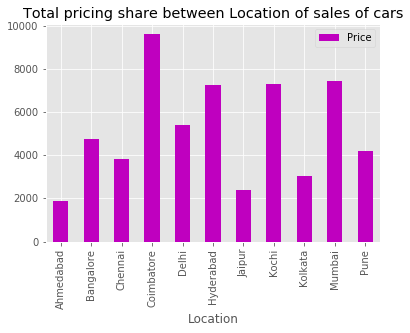

In [7]:
#Plotting Location Of car sales against Its pricing values
location_sales = train.groupby('Location')['Price'].sum()
location_sales = pd.DataFrame(location_sales)
location_sales.plot(kind = 'bar', color = 'm', title = 'Total pricing share between Location of sales of cars')
location_sales

Location of sales is an influencial variables for monitoring market sale of car. from the above bar plot, colmbatore gives the best location for making reasonble sales of car following it high value in market share of cars, be it an automatic or manual kind of car. We also have three obvious location from the above output, which are kochi, hyderabad and mumbai with reasonable market shares of prices.

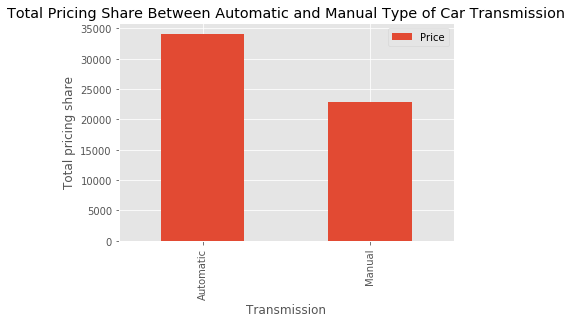

In [8]:
#Plotting The kind of Transmission of a car against Its pricing values
fuel_type_sales = train.groupby('Transmission')['Price'].sum()
fuel_type_sales = pd.DataFrame(fuel_type_sales)
fuel_type_sales = pd.DataFrame(fuel_type_sales).plot(kind = 'bar', title = 'Total Pricing Share Between Automatic and Manual Type of Car Transmission')
plt.ylabel('Total pricing share')
fuel_type_sales

Grouping The price of cars by the the kind of transmision it posses, we have it from the above bar chat that automatic cars has a better market share(pricing) campared to manual cars.

In [9]:
#Checking out the total numbers of car belonging to Transmission and Owner Type category
pd.crosstab(train['Transmission'], train['Owner_Type'])

Owner_Type,First,Fourth & Above,Second,Third
Transmission,,,,
Automatic,1409,1,285,25
Manual,3520,8,683,88


Fromm the Above Summary Table, car with Owner type denoted to be first hand and having a manual transmission, has the highest sales count compared to other owner types.

In [10]:
#Checking out the total numbers of car belonging to Transmission and Fuel Type category
pd.crosstab(train['Fuel_Type'], train['Transmission'])

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,56
Diesel,1108,2097
Electric,2,0
LPG,0,10
Petrol,610,2136


The Above summary table is showing the total count of vehicles belonging to a certain fuel type and Transmission type be it a a first hand owner type, second hand owner type, third hand owner type or fourth and above owner type. Picking out the first row, the dataset does not contain a car with automatic transmission belonging to a CNG fuel type, but countain a total of 56 manual transmission car belonging to CNG fuel type.

In [11]:
grp = dict(list(train.groupby('Transmission')))
print(grp['Automatic'].shape)
print(grp['Manual'].shape)

(1720, 13)
(4299, 13)


From the above output, we have a total of 1720 automatic transmision cars out for sales as depicted by the dataset provided, and a total of 4299 manual transmission cars.

### Converting Object columns to numeric column for EDA

In [12]:
#stripping of the strings
train['Mileage'] = train.Mileage.str.strip('kmplkg/ ')
train['Engine'] = train.Engine.str.strip('CC ')
train['Power'] = train.Power.str.strip(' bhp ')

In [14]:
#cleaning the power column having null as an input
def clean(x):
    if x == 'null':
        return 0
    else:
        return x

train['Power'] = train.Power.apply(clean)

In [15]:
#converting to Float
col = ['Mileage', 'Engine', 'Power']
for x in col:
    train[col] = train[col].astype('float64')

In [16]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


Text(0, 0.5, 'Frequency')

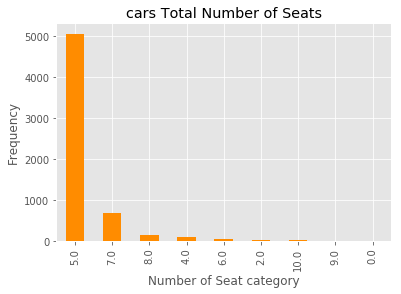

In [17]:
train.Seats.value_counts().plot(kind = 'bar', title = 'cars Total Number of Seats', color = 'darkorange')
plt.xlabel('Number of Seat category')
plt.ylabel('Frequency')

In [18]:
#putting cols into bins
train['engin_bin'] = pd.cut(train['Engine'], bins = 3)
train['power_bin'] = pd.cut(train['Power'], bins = 3)
train['mileage_bin'] = pd.cut(train['Mileage'], bins = 3)

In [19]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engin_bin,power_bin,mileage_bin
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,"(66.074, 2047.333]","(-0.56, 186.667]","(22.36, 33.54]"
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,"(66.074, 2047.333]","(-0.56, 186.667]","(11.18, 22.36]"
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,"(66.074, 2047.333]","(-0.56, 186.667]","(11.18, 22.36]"
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,"(66.074, 2047.333]","(-0.56, 186.667]","(11.18, 22.36]"
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,"(66.074, 2047.333]","(-0.56, 186.667]","(11.18, 22.36]"


Text(0.5, 1.0, 'Numbers of Engine Categorized Into Bins')

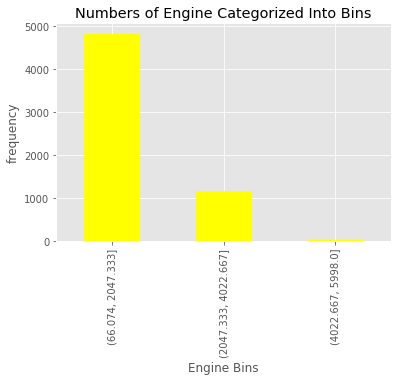

In [20]:
#Plotting out data contained in the bins for insights
train.engin_bin.value_counts().plot(kind = 'bar', color = 'yellow')
plt.xlabel('Engine Bins')
plt.ylabel('frequency')
plt.title('Numbers of Engine Categorized Into Bins')

The above bar chart shows that Cars with Engine ranging from (66.074 - 2047.333 CC) appears to be more than the other specified ranges in the given dataset 

Text(0.5, 1.0, 'Numbers of Power Categorized Into Bins')

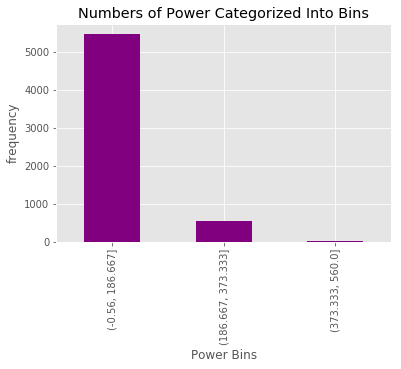

In [21]:
train.power_bin.value_counts().plot(kind = 'bar', color = 'purple')
plt.xlabel('Power Bins')
plt.ylabel('frequency')
plt.title('Numbers of Power Categorized Into Bins')

The above bar chart shows that Cars with Power ranging from (-0.56 - 1186.667 bhp ) appears to be more than the other specified ranges in the given dataset 

Text(0.5, 1.0, 'Numbers of Mileage Categorized Into Bins')

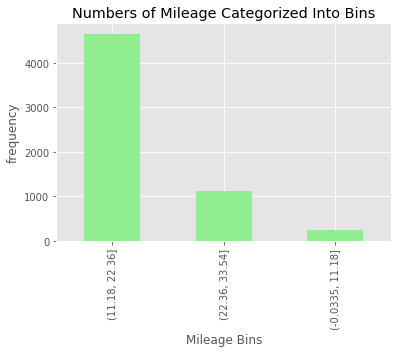

In [22]:
train.mileage_bin.value_counts().plot(kind = 'bar', color = 'lightGreen')
plt.xlabel('Mileage Bins')
plt.ylabel('frequency')
plt.title('Numbers of Mileage Categorized Into Bins')

The above bar chart shows that Cars with mileage ranging from (11.18 - 22.36kmplkg ) appears to be more than the other specified ranges in the given dataset 

Text(0, 0.5, 'Frequency')

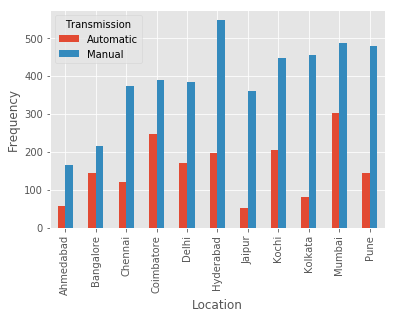

In [56]:
pd.crosstab(train['Location'], train['Transmission']).plot(kind ='bar')
plt.ylabel('Frequency')

From the above bar chat, cars with manual transmission appears to be dominates in all locations of car sales.

<b> Note: </b>
This are just few insights i was able to draw out of the dataset given, you can always do well to download the dataset and explore for morw insights
Your Contribution and error dectection from this notbook will be highly appreciated